<a id='data-gathering'></a>
## Gathering Data


In [1]:
# Importing the Required Libraries
import numpy as np
import pandas as pd
import requests
import json
import time
import math
import re
import tweepy
from tweepy import OAuthHandler
from timeit import default_timer as timer
import matplotlib.pyplot as plt
import matplotlib.style as style 
import seaborn as sns
%matplotlib inline

In [2]:
# Reading the data using the pd.read_csv() function
dfarch = pd.read_csv('NYC.csv', parse_dates=True)

<a id='data-assessment'></a>
## Assessing Data




In [3]:
# Printing the first few rows of the data using head() function
dfarch.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
# Printing the summary information of data using info() function  
dfarch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [5]:
# Printing the rows and columns for data using shape attribute
dfarch.shape

(48895, 16)

In [6]:
# Printing the summary statistics of data using describe() function
dfarch.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [7]:
# Reading random samples from the data  using sample() function
dfarch.sample(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
29059,22342020,Small room in Crown Heights,33060882,Antoine,Brooklyn,Crown Heights,40.67767,-73.95764,Private room,32,1,1,2018-01-22,0.06,1,0
32864,25893395,Master Bedroom on 2nd floor in a sweet house!,22819324,Patricia,Brooklyn,Bushwick,40.69585,-73.90967,Private room,60,2,12,2019-05-27,1.01,2,0
25221,20187293,GiGi's Stunning Place,60839109,Gloria,Brooklyn,East New York,40.67118,-73.86821,Entire home/apt,83,1,42,2019-06-30,1.79,1,348
38547,30320090,"SPACIOUS, PRIVATE ROOM IN MIDTOWN, PARK AVENUE",209758777,Isabel,Manhattan,Midtown,40.74475,-73.98337,Private room,145,1,51,2019-06-23,7.39,2,29
8193,6316666,Sunny private room in Park Slope,1231888,Alejandra,Brooklyn,Park Slope,40.67173,-73.97724,Private room,70,1,1,2015-07-01,0.02,1,0


In [8]:
# Printing the last few rows from Data using the tail() function
dfarch.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [10]:
# Sorting price range in data using the value_counts() function
dfarch.price.value_counts()

100    2051
150    2047
50     1534
60     1458
200    1401
       ... 
780       1
386       1
888       1
483       1
338       1
Name: price, Length: 674, dtype: int64

In [11]:
# Sorting the names in data using the value_counts() function
dfarch.neighbourhood_group.value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

In [12]:
# Checking duplicate IDs in data using duplicated() function
dfarch.id.duplicated().sum()

0

In [14]:
# Checking duplicate host id in data using duplicated() function
dfarch.host_id.duplicated().sum()

11438

In [24]:
# Checking records with battery power in data using notnull() function

dfarch[dfarch['price'].notnull()]
dfarch[dfarch['last_review'].notnull()]
dfarch[dfarch['reviews_per_month'].notnull()]
dfarch[dfarch['number_of_reviews'].notnull()]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


<a id='data-cleaning'></a>
## Cleaning Data


In [26]:
# Creating copies of Data before cleaning
clean = dfarch.copy()

In [27]:
clean = clean[clean.last_review.isnull()]
clean = clean[clean.reviews_per_month.isnull()]

In [28]:
# Test
len(clean[clean.last_review.isnull() == False])
len(clean[clean.reviews_per_month.isnull() == False])

0

In [29]:
clean = clean.loc[clean['name'].str.startswith('&') == False]

In [31]:
clean.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
19,7750,Huge 2 BR Upper East Cental Park,17985,Sing,Manhattan,East Harlem,40.79685,-73.94872,Entire home/apt,190,7,0,NaN,NaN,2,249
26,8700,Magnifique Suite au N de Manhattan - vue Cloitres,26394,Claude & Sophie,Manhattan,Inwood,40.86754,-73.92639,Private room,80,4,0,NaN,NaN,1,0
36,11452,Clean and Quiet in Brooklyn,7355,Vt,Brooklyn,Bedford-Stuyvesant,40.68876,-73.94312,Private room,35,60,0,NaN,NaN,1,365
38,11943,Country space in the city,45445,Harriet,Brooklyn,Flatbush,40.63702,-73.96327,Private room,150,1,0,NaN,NaN,1,365


In [42]:
#Dropping few unnecessary columns

clean.drop(['last_review', 'reviews_per_month', 'latitude', 'longitude'], axis=1, inplace=True)

In [43]:
clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10042 entries, 2 to 48894
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   id                              10042 non-null  int64 
 1   name                            10042 non-null  object
 2   host_id                         10042 non-null  int64 
 3   host_name                       10037 non-null  object
 4   neighbourhood_group             10042 non-null  object
 5   neighbourhood                   10042 non-null  object
 6   room_type                       10042 non-null  object
 7   price                           10042 non-null  int64 
 8   minimum_nights                  10042 non-null  int64 
 9   number_of_reviews               10042 non-null  int64 
 10  calculated_host_listings_count  10042 non-null  int64 
 11  availability_365                10042 non-null  int64 
dtypes: int64(7), object(5)
memory usage: 1019.9+ K

In [44]:
#Save
clean.to_csv('clean.csv', index=False)

<a id='data-visualisation'></a>
## Visualising Data

In [46]:
data = pd.read_csv('clean.csv')

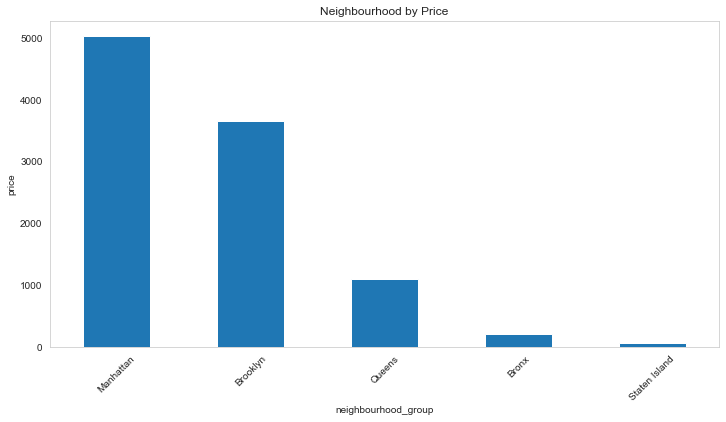

In [48]:
fig, ax = plt.subplots(figsize = (12,6))
sns.set_style("whitegrid")
my_palette = ['#66b3ff', '#00cc99', '#ff6666', '#ffff66', '#8c66ff', '#66ffd9']
sns.color_palette(my_palette)
clean.neighbourhood_group.value_counts().plot.bar()
plt.xticks(rotation=45)
plt.xlabel('neighbourhood_group')
plt.ylabel('price')
plt.title('Neighbourhood by Price')
plt.grid(b=None)
plt.show()

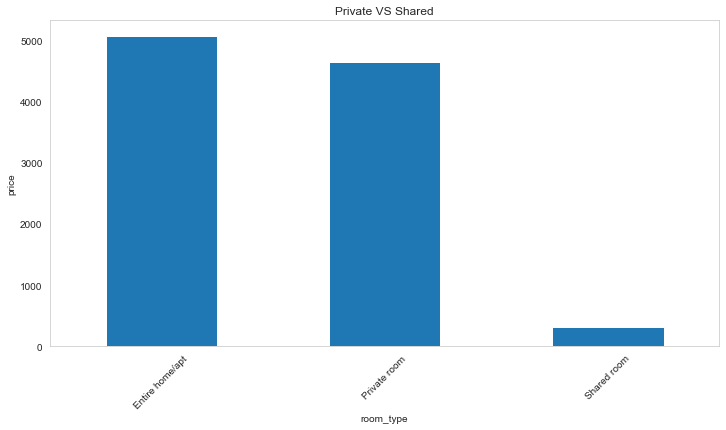

In [53]:
fig, ax = plt.subplots(figsize = (12,6))
sns.set_style("whitegrid")
my_palette = ['#66b3ff', '#00cc99', '#ff6666', '#ffff66', '#8c66ff', '#66ffd9']
sns.color_palette(my_palette)
clean.room_type.value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('room_type')
plt.xticks(rotation=45)
plt.ylabel('price')
plt.title('Private VS Shared')
plt.grid(b=None)
plt.show()

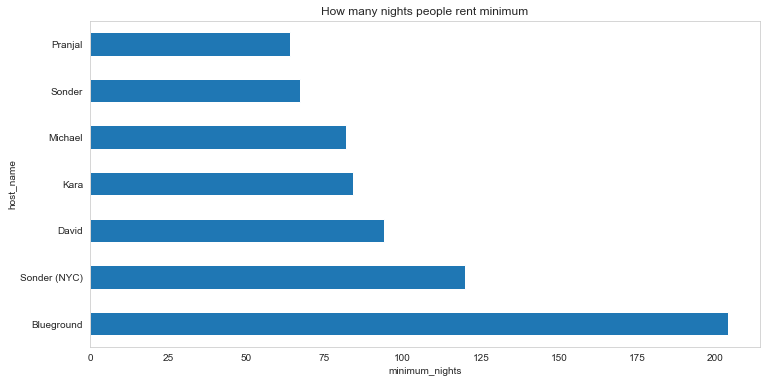

In [55]:
fig, ax = plt.subplots(figsize = (12,6))
sns.set_style("whitegrid")
my_palette = ['#66b3ff', '#00cc99', '#ff6666', '#ffff66', '#8c66ff', '#66ffd9']
sns.color_palette(my_palette)
clean.host_name.value_counts()[0:7].sort_values(ascending=False).plot(kind='barh')
plt.xlabel('minimum_nights')
plt.ylabel('host_name')
plt.title('How many nights people rent minimum')
plt.grid(b=None)
plt.show()